In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4308,ham,He dint tell anything. He is angry on me that ...,NaN,NaN,NaN
5382,ham,"I can make it up there, squeezed &lt;#&gt; b...",NaN,NaN,NaN
4629,ham,Everybody had fun this evening. Miss you.,NaN,NaN,NaN
659,spam,88800 and 89034 are premium phone services cal...,NaN,NaN,NaN
1791,ham,U havenåÕt lost me ill always b here 4u.i didn...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.size


27860

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Data Cleaning

In [10]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [11]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [12]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [14]:
df.sample(5)

,target,text
2591,ham,Still work going on:)it is very small house.
3876,ham,"Sorry sir, i will call you tomorrow. senthil...."
3245,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
5001,ham,You still around? Looking to pick up later
5151,ham,No problem with the renewal. I.ll do it right ...


In [15]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

In [16]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [18]:
df = df.drop_duplicates(keep='first')

In [19]:
df.sample(3)

,target,text
330,ham,K.k:)apo k.good movie.
4117,ham,Watch lor. I saw a few swatch one i thk quite ...
3850,ham,We have all rounder:)so not required:)


In [20]:
# final dataset format
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [21]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

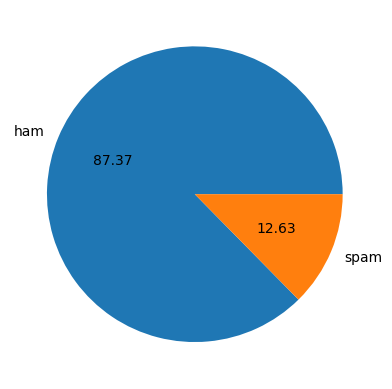

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [24]:
# Data is unbalanced

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [28]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [29]:
# counting the number of alphabets

In [30]:
df['num_characters'] =  df['text'].apply(len)

C:\Users\hario\AppData\Local\Temp\ipykernel_17672\3050218660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] =  df['text'].apply(len)


In [31]:
df

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [32]:
# num of words

In [33]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_17672\3620582556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [34]:
df

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35
5568,ham,Will Ì_ b going to esplanade fr home?,37,9
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15
5570,ham,The guy did some bitching but I acted like i'd...,125,27


In [35]:
import nltk

In [36]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [37]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_17672\2435226368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [38]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [39]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [40]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\hario\AppData\Local\Temp\ipykernel_17672\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [43]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [44]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
# ham messages
# 0 is denoting the legal or verified messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
# spam messages
# 1 is denoting the illegal or suspicious messages.
df[df['target']==1][['num_words','num_characters','num_sentences']].describe()

,num_words,num_characters,num_sentences
count,653.000000,653.000000,653.000000
mean,27.667688,137.891271,2.970904
std,7.008418,30.137753,1.488425
min,2.000000,13.000000,1.000000
25%,25.000000,132.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

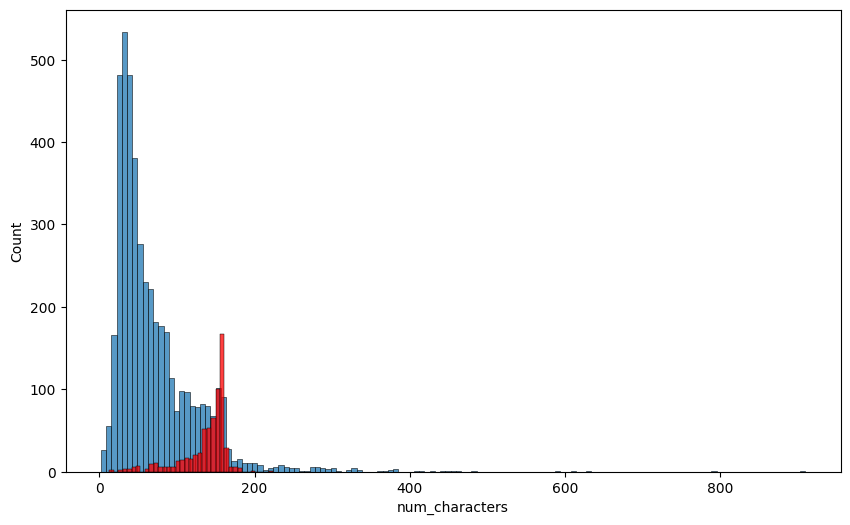

In [48]:
plt.figure(figsize= (10,6))
sns.histplot(df[df['target']=='ham']['num_characters'])
sns.histplot(df[df['target']=='spam']['num_characters'],color='red')

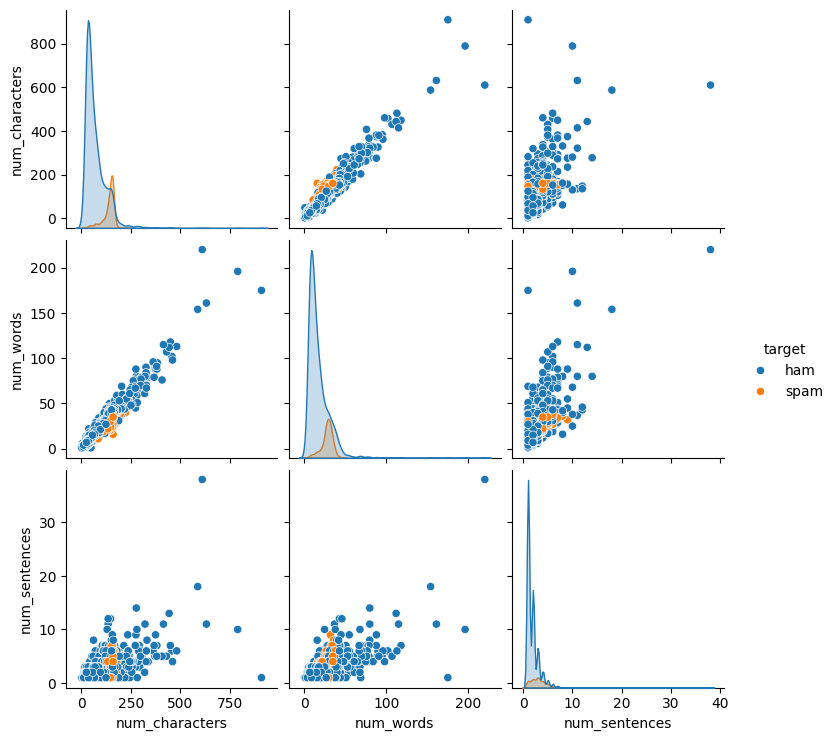

In [49]:
sns.pairplot(df,hue='target')

In [50]:
df_copy = df

In [52]:
type(df['target'])

pandas.core.series.Series

In [60]:
df.sample(40)


,target,text,num_characters,num_words,num_sentences
5459,0,If you hear a loud scream in about &lt;#&gt; m...,120,32,1
160,0,Keep yourself safe for me because I need you a...,115,25,1
2940,0,My supervisor find 4 me one lor i thk his stud...,95,25,3
23,0,Aft i finish my lunch then i go str down lor. ...,88,23,3
662,0,Sorry me going home first... Daddy come fetch ...,57,12,1
1851,0,Dunno da next show aft 6 is 850. Toa payoh got...,51,14,2
1375,0,We're finally ready fyi,23,5,1
3618,1,8007 25p 4 Alfie Moon's Children in Need song ...,166,36,3
3515,0,"Well, I was about to give up cos they all said...",194,44,3
1225,0,"sir, you will receive the account no another 1...",75,17,2


<Axes: xlabel='num_words', ylabel='Count'>

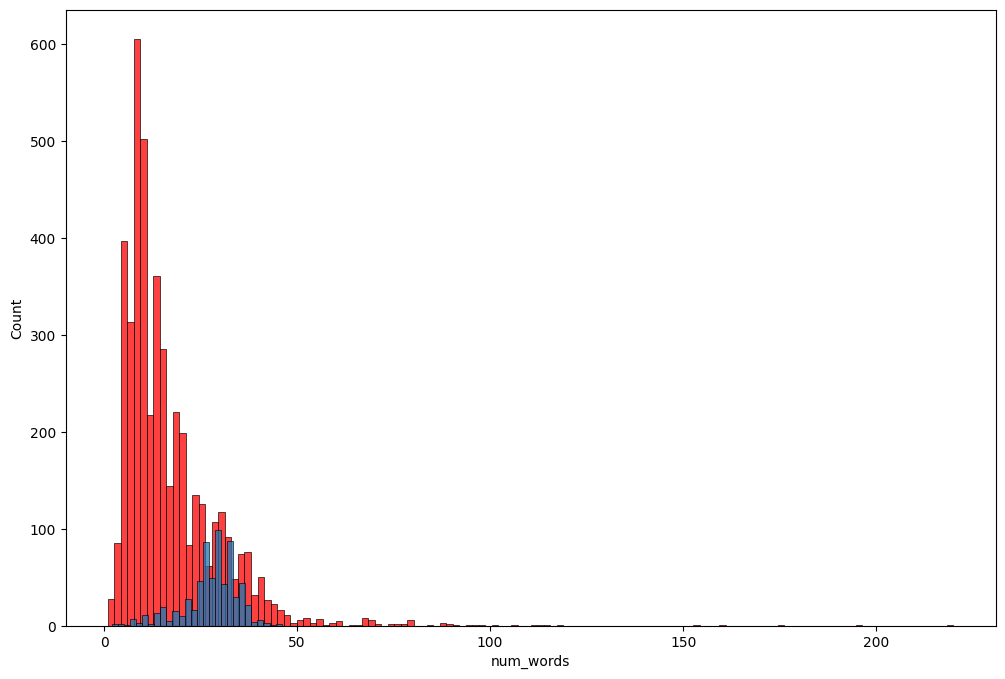

In [68]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'])


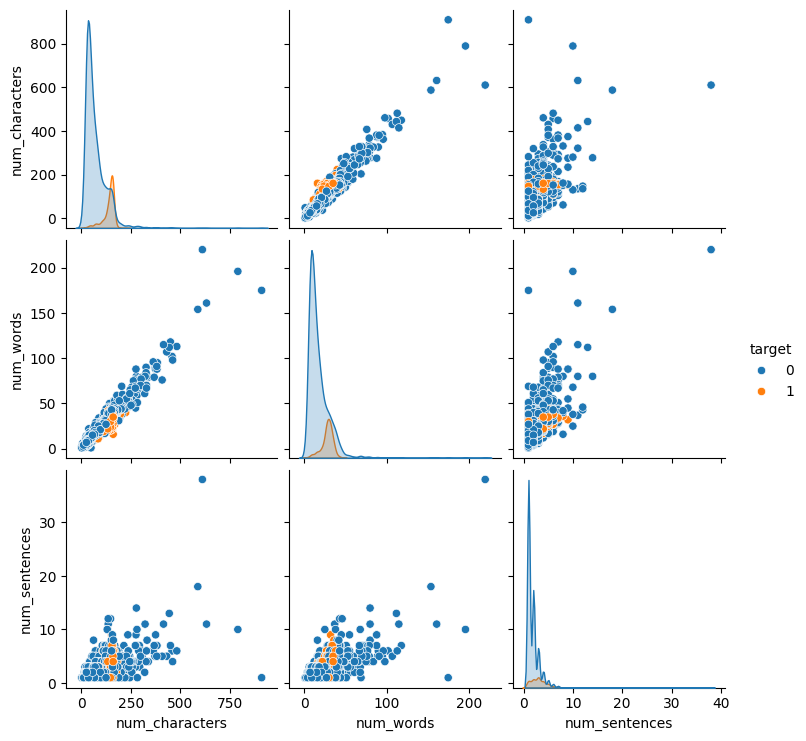

In [70]:
sns.pairplot(df,hue='target')

In [75]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [76]:
df.dtypes

target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

In [77]:
numeric_df = df.select_dtypes(include=['number'])

<Axes: >

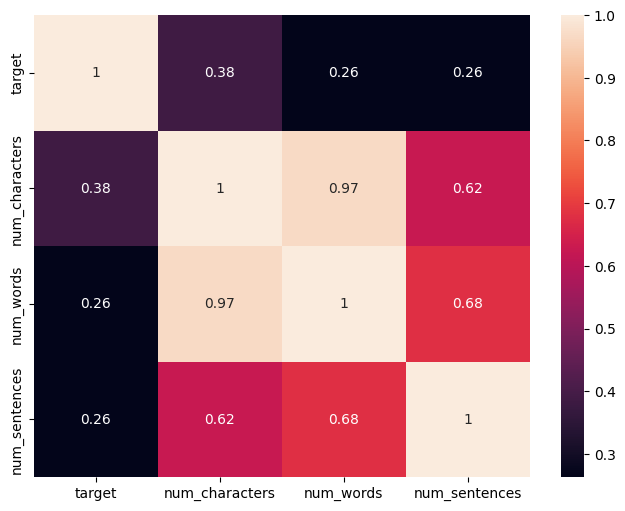

In [80]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)

# 3. Data Preprocessing

1. lowercase
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [97]:
transform_text("hello I am Hariom Singh Thakur and I am 20 years old having $10000 in my @axis bank.")

['hello',
 'i',
 'am',
 'hariom',
 'singh',
 'thakur',
 'and',
 'i',
 'am',
 '20',
 'years',
 'old',
 'having',
 '10000',
 'in',
 'my',
 'axis',
 'bank']

In [98]:
import nltk

In [127]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [100]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [101]:
import string

In [129]:
print(string.punctuation)
print(ps.stem("playing"))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
play


In [142]:
def transform_text(text):
    text = text.lower() #lowercasing
    text = nltk.word_tokenize(text) #tokenization
    y = []
    # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:] #cloning
    y.clear()
    
    # removing punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        # stemming of words like playing->play
        y.append(ps.stem(i))

    
    return " ".join(y)

In [143]:
transform_text(sample)

'still look car buy gone 4the drive test yet'

In [144]:
sample = df['text'][101]

In [145]:
sample

"I'm still looking for a car to buy. And have not gone 4the driving test yet."

In [147]:
df.sample(50)

,target,text,num_characters,num_words,num_sentences
3375,0,"Good afternon, my love. How are today? I hope ...",151,34,5
402,0,The hair cream has not been shipped.,36,8,1
1263,0,Ok. No wahala. Just remember that a friend in ...,54,12,2
4256,1,important information 4 orange user . today is...,152,28,2
143,0,I know you are. Can you pls open the back?,42,12,2
428,0,7 at esplanade.. Do Ì_ mind giving me a lift c...,69,18,1
4243,0,"Aight, I'm chillin in a friend's room so text ...",71,19,1
172,0,What time you coming down later?,33,7,1
3074,0,Take us out shopping and Mark will distract Is...,53,9,1
5228,1,PRIVATE! Your 2003 Account Statement for <fone...,146,27,3


In [151]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\hario\AppData\Local\Temp\ipykernel_17672\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [153]:
df.sample(10)

,target,text,num_characters,num_words,num_sentences,transformed_text
2877,1,Hey Boys. Want hot XXX pics sent direct 2 ur p...,140,33,4,hey boy want hot xxx pic sent direct 2 ur phon...
466,0,They don't put that stuff on the roads to keep...,83,18,1,put stuff road keep get slipperi
2211,0,Just gettin a bit arty with my collages at the...,119,30,2,gettin bit arti collag mo well tryin 2 ne way ...
3195,0,"I av a new number, . Wil u only use this one,ta.",49,16,2,av new number wil u use one ta
2558,0,"Some friends want me to drive em someplace, pr...",65,13,1,friend want drive em someplac probabl take
2902,0,Tell me pa. How is pain de.,27,8,1,tell pain de
2405,0,I'm meeting Darren...,21,5,1,meet darren
4901,1,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,134,27,2,free polyphon rington text super 87131 get fre...
4460,0,Thanks again for your reply today. When is ur ...,236,55,5,thank repli today ur visa come r u still buy g...
2396,0,Well you told others you'd marry them...,40,9,1,well told other marri


In [154]:
from wordcloud import WordCloud # using wordcloud to display the grop of spam messages in visual format

In [175]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [176]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

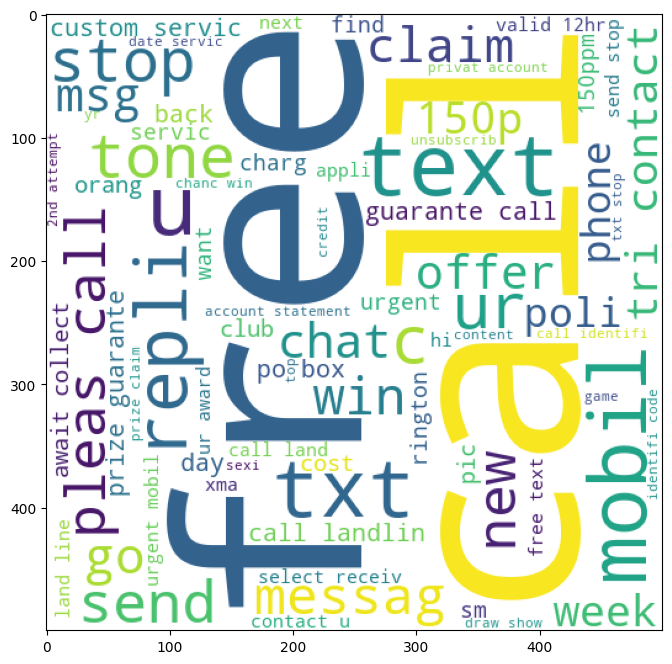

In [178]:
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)